In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats

/Users/alex/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


The goal of this code is to perform an in-depth analysis of what makes Major League Soccer (MLS, USA) different from the English Premier League (EPL, England). Often regarded as the best soccer league in the world, the EPL has players that have market values of over 100 million dollars. Most teams in the MLS don't even have a combined player value of 100 million dollars. This analysis aims to compare the play styles of both leagues and try to determine what makes the EPL such a highly regarded league. 

# Houston Dynamo Stats

In [2]:
# Houston Dynamo 2023 Data
houston_data = pd.read_html("https://fbref.com/en/squads/0d885416/2023/Houston-Dynamo-Stats")

In [3]:
# Each index in data
# 0 - Standard
# 1 - Scores and Fixtures
# 2 - Goalkeeping
# 3 - Advanced Goalkeeping
# 4 - Shooting
# 5 - Passing
# 6 - Pass Types
# 7 - Goal and Shot Creation
# 8 - Defensive Actions
# 9 - Possession
# 10 - Playing Time
# 11 - Miscellaneous Stats

In [4]:
# Standard Stats

# Fix columns names
standard = houston_data[0]

standard.columns = standard.columns.droplevel(0)

# Remove bottom 2 rows - Squad total and Opponent total
standard = standard.iloc[:-2]

#standard
#standard.columns

### Exploring Minutes Played

In [5]:
# Player name, position, age, and minutes
player_age_time = standard[['Player', 'Pos', 'Age', 'Min']]
#player_age_time

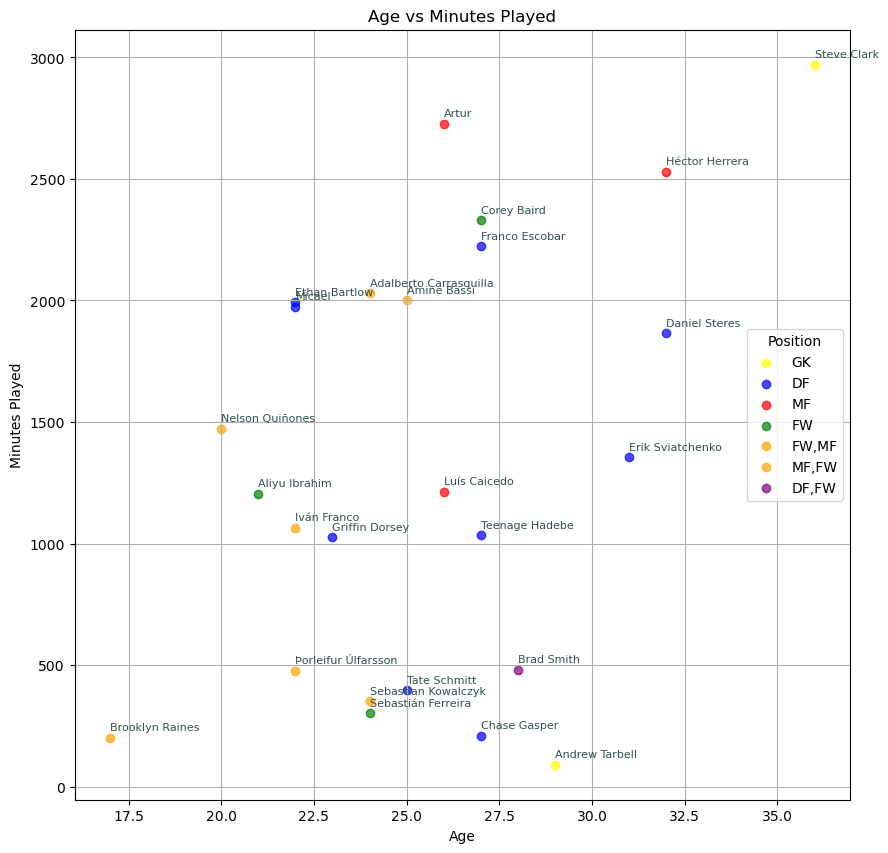

In [6]:
# Define a color map based on unique values in the 'Pos' column
pos_colors = {'GK': 'yellow', 'DF': 'blue', 'MF':'red', 'FW': 'green', 'FW,MF': 'orange', 'MF,FW': 'orange', 'DF,FW': 'purple'}

# Plotting the scatter plot with different colors for each position
plt.figure(figsize=(10, 10))
for pos, color in pos_colors.items():
    subset = player_age_time[player_age_time['Pos'] == pos]
    plt.scatter(subset['Age'], subset['Min'], color=color, label=pos, alpha=0.7)

# Annotating each point with the 'Player' column value
for i, player in enumerate(player_age_time['Player']):
    plt.annotate(player, (player_age_time['Age'].iloc[i], player_age_time['Min'].iloc[i]),
                 textcoords="offset points", xytext=(0, 5), ha='left', fontsize=8, color='darkslategrey')

plt.title('Age vs Minutes Played')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.legend(title='Position', loc='center right')
plt.grid(True)
plt.show()

- In this scatterplot, players' age and minutes played are plotted. Each point is annotated with name and color coded by position

- Houston's squad is relatively young, with only 4 players older than 30

- As expected, Houston's goalie logged the most minutes last season. He's also their oldest player

- Hector Herrera and Artur are the only outfield players that played more than 2500 minutes

- Corey Baird is the only true forward that played significant minutes



### Exploring Goals & Assists

In [7]:
# Player performance
player_performance = standard.iloc[:,:-13] # Remove per 90 minutes

# Create new column of G+A with no PKs
player_performance['npG+A'] = player_performance['Ast'] + player_performance['G-PK']

# Get desired columns
player_performance = player_performance[['Player', 'npG+A', 'npxG+xAG']]

# Data at 0 & 1 npG+A is too cluttered
# Only players with > 1 npG+A
player_performance = player_performance[player_performance['npG+A'] > 1]
player_performance.reset_index(drop=True, inplace=True)

#player_performance

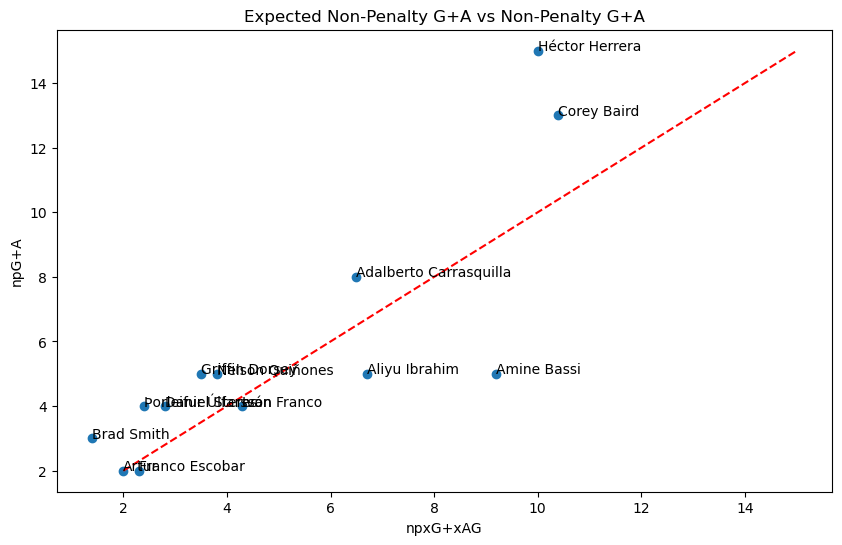

In [8]:
plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(player_performance['npxG+xAG'], player_performance['npG+A'])

# Annotate each point with 'Player' values
for i, player in enumerate(player_performance['Player']):
    plt.annotate(player, (player_performance['npxG+xAG'][i], player_performance['npG+A'][i]))


# Plot the y=x line
x_line = np.linspace(min(player_performance['npG+A']), max(player_performance['npG+A']), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='y=x')

    
# Set labels and title
plt.xlabel('npxG+xAG')
plt.ylabel('npG+A')
plt.title('Expected Non-Penalty G+A vs Non-Penalty G+A')

# Show the plot
plt.show()

- In this scatterplot, total goals & assists and expected goals & assists are plotted.
- Only players who contributed more than 1 G+A are plotted due to the clutter at 0 and 1 G+A
- A trendline with equation y=x is plotted. The location of points relative to this line indicate whether or not a player outperformed their xG+xAG
- As we can see, most points are above the line, meaning that player outperformed their xG+xAG. The only players that didn't were Amine Bassi, Aliyu Ibrahim, Ivan Franco, and Franco Escobar
- Hector Herrera significantly outperformed his npxG+xAG

### Seeing which formations were most successful

In [9]:
# Scores and Fixtures
scores = houston_data[1]

In [10]:
# Get just result and formation
formations = scores[['Result', 'Formation']]

# Use a pivot table to get result data
result_counts = formations.pivot_table(index='Formation', columns='Result', aggfunc='size', fill_value=0)
result_counts

Result,D,L,W
Formation,,,
3-4-1-2,0,0,1
3-4-3,1,0,0
4-2-3-1,5,7,9
4-3-3,4,4,5
4-4-1-1,0,0,1
4-4-2,1,1,0


- Throughout the season, Houston often used a formation that had 4 defenders, 3 central midfielders, 2 wide players, and a target player
- Houston played 2 games with 3 at the back and didn't lose either of them. They may have used this formation to counter the team they were playing against or because of avaiable players

# Team Stats

In [11]:
# 2023 MLS Stats 
mls_data = pd.read_html('https://fbref.com/en/comps/22/2023/2023-Major-League-Soccer-Stats')

# 2022-2023 EPL Stats 
epl_data = pd.read_html('https://fbref.com/en/comps/9/2022-2023/2022-2023-Premier-League-Stats')

#### Looking at basic stats for EPL

In [12]:
# Squad Standard Stats
team_data = epl_data[2] # Change this between leagues
team_data.columns = team_data.columns.droplevel(0)

In [13]:
# Standings
standings = epl_data[0]

In [14]:
# Heatmap for basic stats
basic_stats_epl = team_data[['Squad', 'Poss']]
#basic_stats = basic_stats.iloc[:,:-1] # Remove last column (per 90)
#basic_stats

In [15]:
standings = standings[['Rk', 'Squad', 'GF', 'GA']]
basic_stats_epl = pd.merge(basic_stats_epl, standings, left_on='Squad', right_on='Squad')
basic_stats_epl = basic_stats_epl[['Squad', 'Rk', 'Poss', 'GF', 'GA']]
basic_stats_epl.columns = ['Squad', 'Position', 'Possession', 'Goals For', 'Goals Against']
basic_stats_epl = basic_stats_epl.sort_values(by='Position')

In [16]:
# Set 'Squad' as the index for better visualization
basic_stats_epl.set_index('Squad', inplace=True)

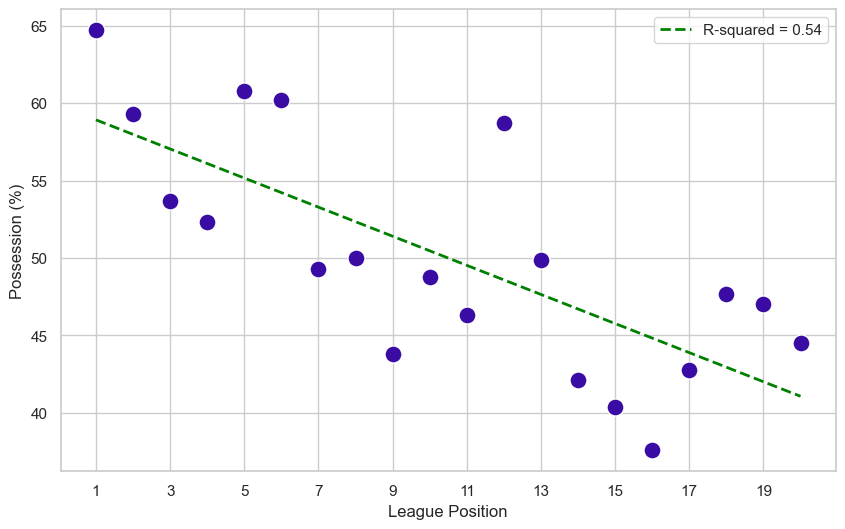

In [17]:
from scipy.stats import linregress

# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Position', y='Possession', data=basic_stats_epl, color='#3A0CA3', s=150)

# Fit a line of best fit
slope, intercept, r_value, p_value, std_err = linregress(basic_stats_epl['Position'], basic_stats_epl['Possession'])
x_values = np.array([min(basic_stats_epl['Position']), max(basic_stats_epl['Position'])])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='green', linestyle='--', linewidth=2, label=f'R-squared = {r_value**2:.2f}')  # Plot the line with slope-intercept form

# Customize the plot
plt.xlabel('League Position')
plt.ylabel('Possession (%)')

# Set x-axis tick increment to 2
plt.xticks(range(int(min(basic_stats_epl['Position'])), int(max(basic_stats_epl['Position']))+1, 2))

# Add legend
plt.legend()

plt.show()

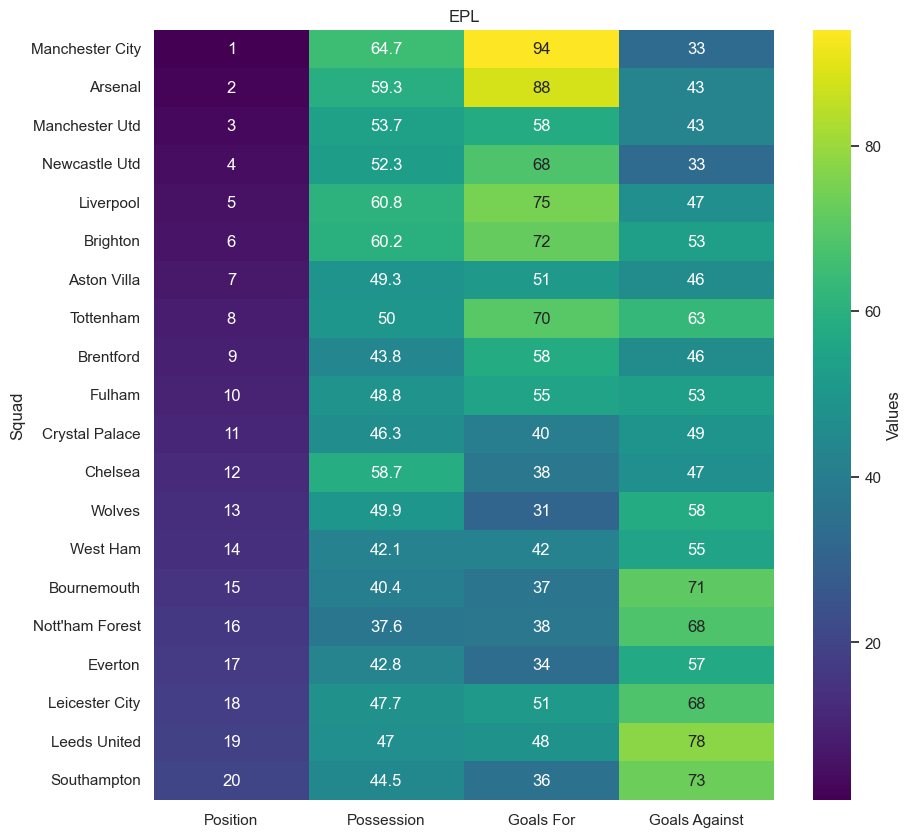

In [18]:
# Create a heatmap with 'Squad' on the y-axis
plt.figure(figsize=(10, 10))
h = sns.heatmap(basic_stats_epl, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Values'})
h.set(xlabel='')
plt.title('EPL')
plt.show()

- Houston had 51.6% possession on average during the 2023 season. This value is neither high nor low relative to the rest of the league
- Houston scored 51 goals, and only 7 teams scored more. This is impressive considering Corey Baird was their only true forward
- Only 3 teams allowed fewer goals than Houston's 38

#### Looking at basic stats for MLS

In [19]:
# Squad Standard Stats
team_data = mls_data[12] # Change this between leagues
team_data.columns = team_data.columns.droplevel(0)

In [20]:
basic_stats_mls = team_data[['Squad', 'Poss']]
basic_stats_mls['Position'] = [10, 25, 20, 19, 24, 28, 3, 23, 9, 1, 14, 27, 26, 8,
                        21, 12, 6, 22, 17, 2, 5, 18, 11, 16, 7, 15, 4, 29, 13]

/var/folders/qb/6_h8jj053vx4xpnglc63kx6r0000gn/T/ipykernel_88207/3365995262.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  basic_stats_mls['Position'] = [10, 25, 20, 19, 24, 28, 3, 23, 9, 1, 14, 27, 26, 8,


In [21]:
# East Conf
east_conf = mls_data[0]
east_conf = east_conf[['Squad', 'GF', 'GA']]

In [22]:
# West Conf
west_conf = mls_data[2]
west_conf = west_conf[['Squad', 'GF', 'GA']]

In [23]:
# Combine Conferences
comb_conf = pd.concat([east_conf, west_conf])

In [24]:
basic_stats_mls = pd.merge(basic_stats_mls, comb_conf, left_on='Squad', right_on='Squad')
basic_stats_mls = basic_stats_mls.sort_values(by='Position')
basic_stats_mls.columns = ['Squad', 'Possession', 'Position', 'Goals For', 'Goals Against']
basic_stats_mls = basic_stats_mls[['Squad', 'Position', 'Possession', 'Goals For', 'Goals Against']]

In [25]:
# Set 'Squad' as the index for better visualization
basic_stats_mls.set_index('Squad', inplace=True)

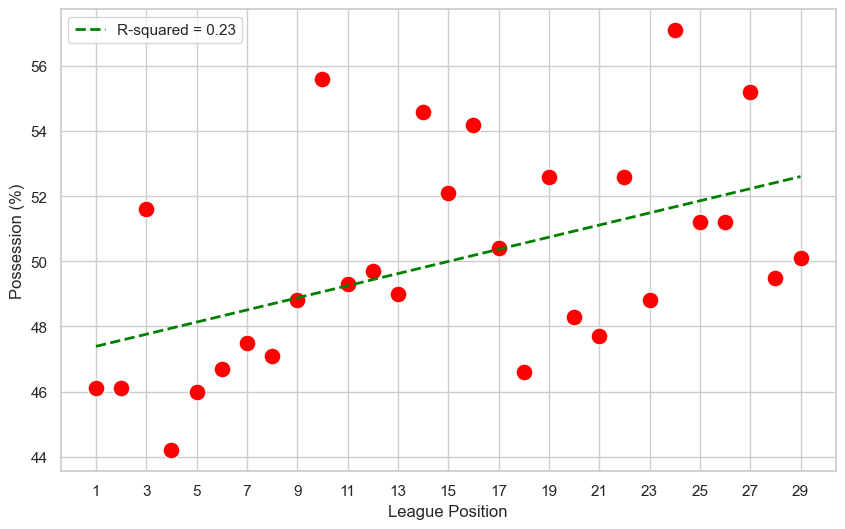

In [26]:
sns.set(style="whitegrid")  # Set the style of the plot

# Create the scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Position', y='Possession', data=basic_stats_mls, color='red', s=150)

# Fit a line of best fit
slope, intercept, r_value, p_value, std_err = linregress(basic_stats_mls['Position'], basic_stats_mls['Possession'])
x_values = np.array([min(basic_stats_mls['Position']), max(basic_stats_mls['Position'])])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='green', linestyle='--', linewidth=2, label=f'R-squared = {r_value**2:.2f}')  # Plot the line with slope-intercept form

# Customize the plot
plt.xlabel('League Position')
plt.ylabel('Possession (%)')

# Set x-axis tick increment to 2
plt.xticks(range(int(min(basic_stats_mls['Position'])), int(max(basic_stats_mls['Position']))+1, 2))

# Add legend
plt.legend()

plt.show()

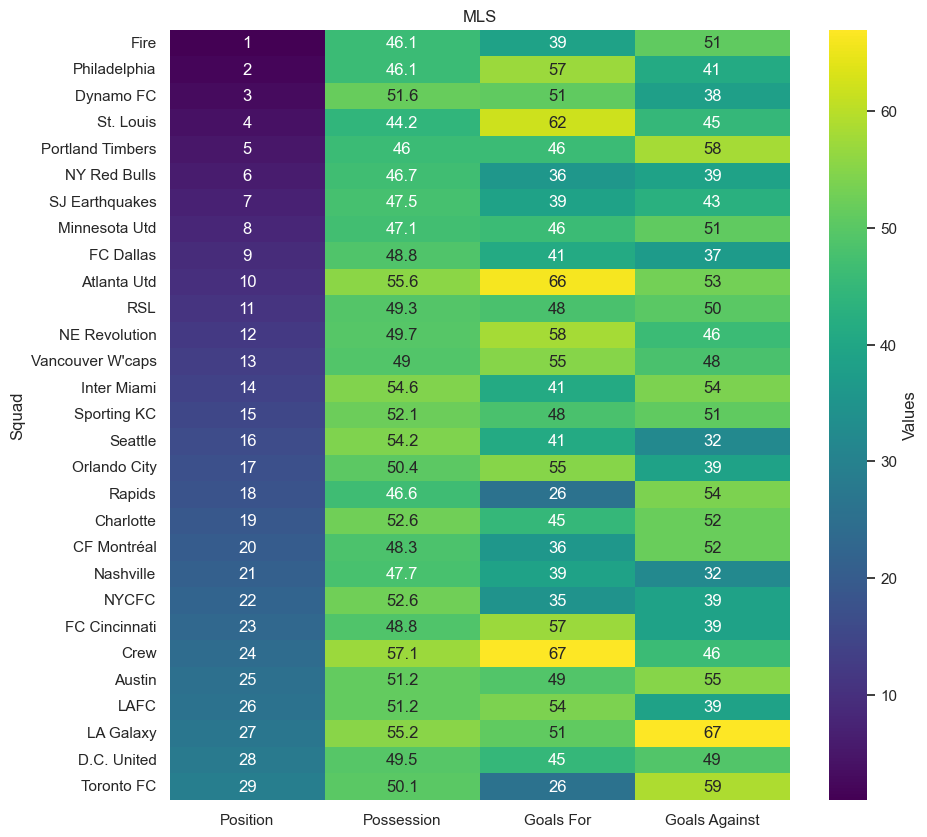

In [27]:
# Create a heatmap with 'Squad' on the y-axis
plt.figure(figsize=(10, 10))
h = sns.heatmap(basic_stats_mls, annot=True, cmap='viridis', fmt='g', cbar_kws={'label': 'Values'})
h.set(xlabel='')
plt.title('MLS')
plt.show()

In [28]:
goal_averages = {
    'MLS': {'Average Goals Scored': round(basic_stats_mls['Goals For'].sum()/498, 2)},
    'EPL': {'Average Goals Scored': round(basic_stats_epl['Goals For'].sum()/380, 2)}
}
goal_averages = pd.DataFrame(goal_averages)
goal_averages

,MLS,EPL
Average Goals Scored,2.73,2.85


#### Exploring attendance 

In [29]:
# Get Stadium Data
stadiums = pd.read_html('https://en.wikipedia.org/wiki/List_of_Major_League_Soccer_stadiums')[1]

In [30]:
stadiums['Capacity'] = stadiums['Capacity'].str.replace(r'\([^)]*\)|\[[^]]*\]', '', regex=True)
stadiums['Capacity'] = stadiums['Capacity'].str.replace('[^0-9,]', '', regex=True)  # Remove non-digit characters
stadiums['Capacity'] = stadiums['Capacity'].str.replace(',', '', regex=False)  # Remove commas
stadiums['Capacity'] = stadiums['Capacity'].str.extract(r'(\d+)')
stadiums = stadiums[['Team', 'Capacity']]

In [31]:
# Western Conference Data
west_conf = pd.read_html('https://fbref.com/en/comps/22/2023/2023-Major-League-Soccer-Stats')[2]

In [32]:
west_conf_attend = west_conf[['Squad', 'Attendance']]

In [33]:
# Eastern Conference Data
east_conf = pd.read_html('https://fbref.com/en/comps/22/2023/2023-Major-League-Soccer-Stats')[0]

In [34]:
east_conf_attend = east_conf[['Squad', 'Attendance']]

In [35]:
# Combine conference data
attend_total = pd.concat([east_conf_attend, west_conf_attend], ignore_index=True)

In [36]:
# Make team names align
value_mapping = {
    'Orlando City SC': 'Orlando City',
    'Philadelphia Union': 'Philadelphia',
    'New England Revolution': 'New England',
    'Atlanta United FC': 'Atlanta Utd',
    'Nashville SC': 'Nashville',
    'New York Red Bulls': 'NY Red Bulls',
    'Charlotte FC': 'Charlotte',
    'New York City FC': 'NYCFC',
    'Chicago Fire FC': 'Chicago Fire',
    'Inter Miami CF': 'Inter Miami',
    'St. Louis City SC': 'St. Louis',
    'Seattle Sounders FC': 'Seattle',
    'Houston Dynamo FC': 'Dynamo FC',
    'Vancouver Whitecaps FC': 'Vancouver',
    'Sporting Kansas City': 'Sporting KC',
    'San Jose Earthquakes': 'San Jose',
    'Minnesota United': 'Minnesota Utd',
    'Austin FC': 'Austin',
    'Los Angeles Galaxy': 'LA Galaxy'
}
stadiums['Team'] = stadiums['Team'].replace(value_mapping)

In [37]:
# Merge to get average attendance and max capacity
attend_merged = pd.merge(attend_total, stadiums, left_on='Squad', right_on='Team', how='inner')
attend_merged = attend_merged.drop('Team', axis=1)

In [38]:
# Set the 'Squad' column as the index for better visualization
#attend_merged.set_index('Squad', inplace=True)

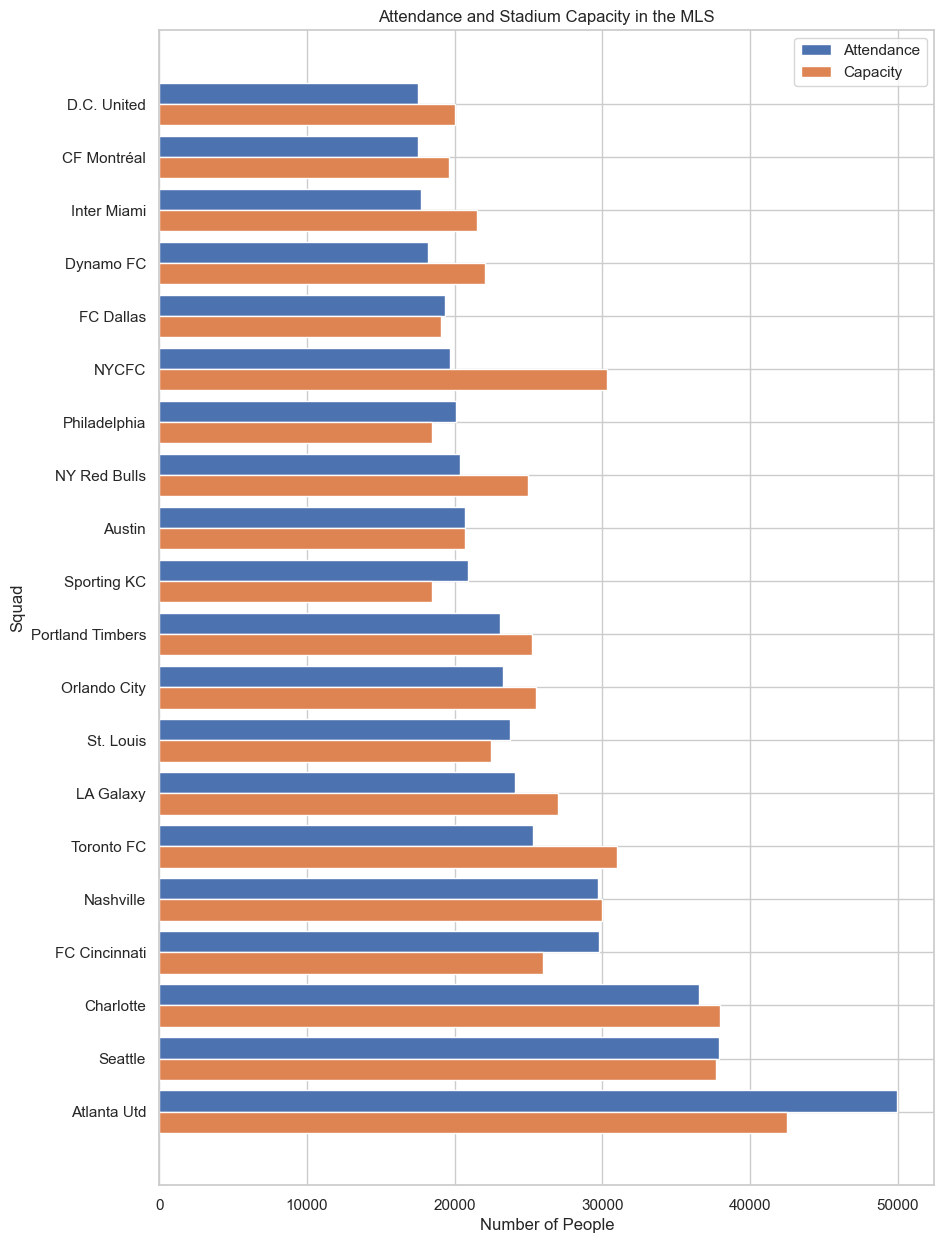

In [39]:
attend_merged = attend_merged.sort_values(by='Attendance', ascending=False)
Y = attend_merged['Squad']
attend = attend_merged['Attendance']
capacity = attend_merged['Capacity'].astype(int)

Y_axis = np.arange(len(Y))

plt.figure(figsize=(10, 15))

plt.barh(Y_axis + 0.2, attend, 0.4, label='Attendance')
plt.barh(Y_axis - 0.2, capacity, 0.4, label='Capacity')

plt.yticks(Y_axis, Y)
plt.xlabel('Number of People')
plt.ylabel('Squad')
plt.title('Attendance and Stadium Capacity in the MLS')
plt.legend()
plt.show()

- This multi-set bar chart shows attendance and stadium capacity for each team in the MLS
- For some teams, the average attendance is greater than the capacity. This is most likely due to the recorded capacities being reduced. A lot of MLS teams play in Football stadiums and they reduce capacity for soccer games
- Houston had the lowest average attendance in the league while having an approximately average capacity

### Exploring Correlation Between Different Variables

In [40]:
# Get Shooting Data
shooting_stats = pd.read_html('https://fbref.com/en/comps/22/2023/shooting/2023-Major-League-Soccer-Stats')[0]

In [41]:
# Fix Columns
shooting_stats.columns = shooting_stats.columns.droplevel(0)

In [42]:
# Get columns for correlation matrix
shooting_stats = shooting_stats[['Gls', 'Sh', 'SoT', 'Dist']]

In [43]:
# Get Passing Data
passing_stats = pd.read_html('https://fbref.com/en/comps/22/2023/passing/2023-Major-League-Soccer-Stats')[0]

In [44]:
# Fix Columns
passing_stats.columns = passing_stats.columns.droplevel(0)

In [45]:
# Get columns for correlation matrix
passing_stats = passing_stats[['Cmp', 'Att', 'TotDist', 'PrgDist', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP']]
passing_stats = passing_stats.iloc[:, [0, 4, 8, 9, 10, 11, 12, 13, 14]]

In [46]:
all_stats = pd.concat([shooting_stats, passing_stats], axis=1, ignore_index=False)
all_stats.columns = ['Goals', 'Shots', 'Shots on Target', 'Avg Shot Distance', 'Completed Passes', 'Attemped Passes', 
                     'Total Pass Distance', 'Progressive Pass Distance', 'Key Passes', 'Passes Into Final 1/3', 
                    'Passes Into Penalty Area', 'Crosses Into Penalty Area', 'Progressive Passes']

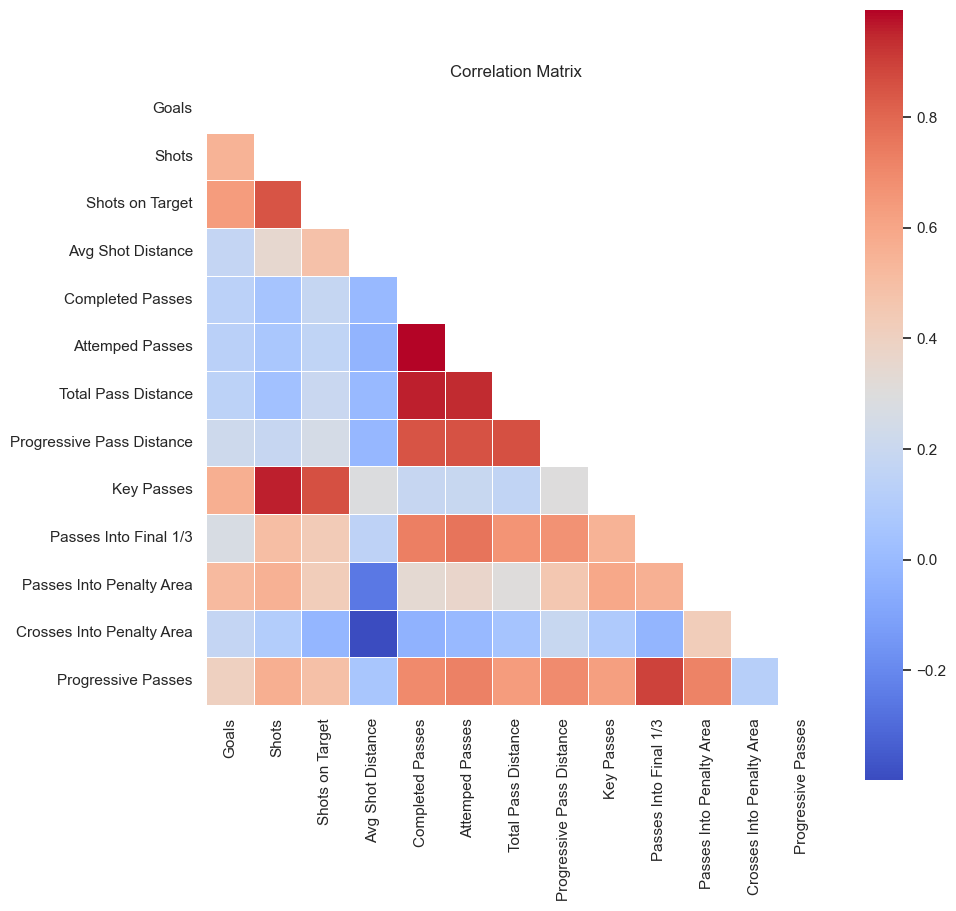

In [47]:
all_stats_correlation = all_stats.corr()

# Create a heatmap using seaborn
sns.set(style="white")  # Set the style of the plot

# Generate a mask for the lower triangle including the diagonal
mask = np.triu(np.ones_like(all_stats_correlation, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask
sns.heatmap(all_stats_correlation, annot=False, cmap='coolwarm', mask=mask, linewidths=.7, square=True, ax=ax)

# Customize the plot
plt.title('Correlation Matrix')
plt.show()

### Explore passing data

In [48]:
passes_mls = pd.read_html('https://fbref.com/en/comps/22/2023/passing/2023-Major-League-Soccer-Stats')[0]

In [49]:
passes_mls.columns = passes_mls.columns.droplevel(0)

In [50]:
passes_epl = pd.read_html('https://fbref.com/en/comps/9/2022-2023/passing/2022-2023-Premier-League-Stats')[0]

In [51]:
passes_epl.columns = passes_epl.columns.droplevel(0)

Text(0.5, 1.0, 'Short Passes Per 90')

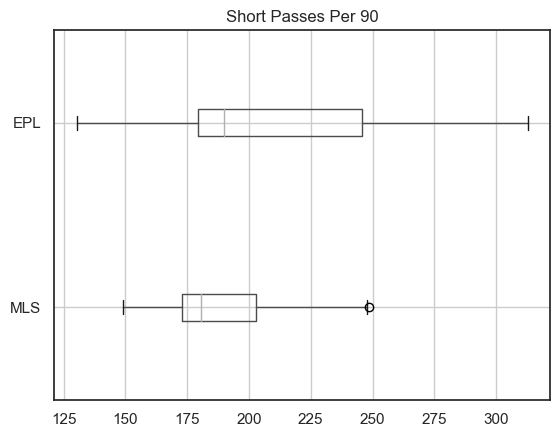

In [52]:
passes = pd.DataFrame({'MLS': passes_mls.iloc[:, 9]/34, 
                       'EPL': passes_epl.iloc[:, 9]/38}) # Change based on desired stat
passes.boxplot(vert=False)
plt.title('Short Passes Per 90')

446.4420159544548
2055.66291203788


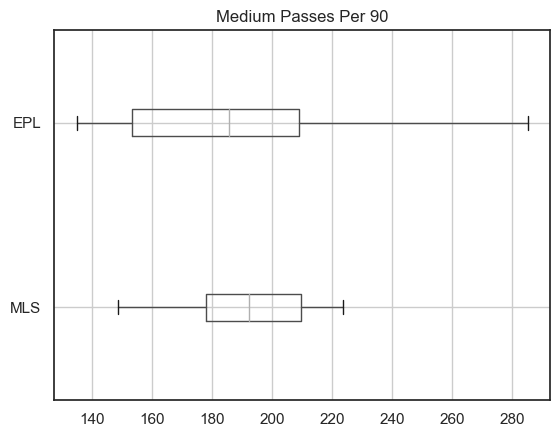

In [53]:
passes = pd.DataFrame({'MLS': passes_mls.iloc[:, 12]/34, 
                       'EPL': passes_epl.iloc[:, 12]/38}) # Change based on desired stat
passes.boxplot(vert=False)
plt.title('Medium Passes Per 90')

print((passes_mls.iloc[:, 12]/34).var())
print((passes_epl.iloc[:, 12]/34).var())

Text(0.5, 1.0, 'Long Passes Per 90')

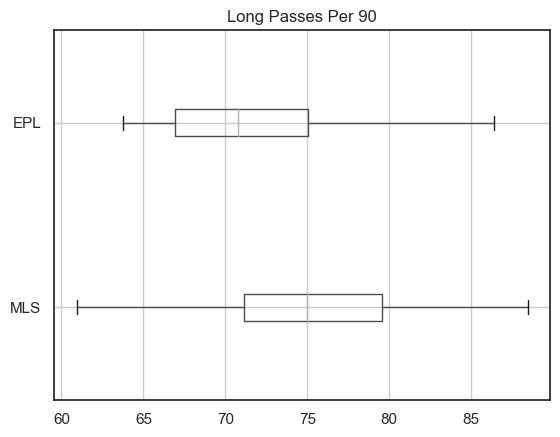

In [54]:
passes = pd.DataFrame({'MLS': passes_mls.iloc[:, 15]/34, 
                       'EPL': passes_epl.iloc[:, 15]/38}) # Change based on desired stat
passes.boxplot(vert=False)
plt.title('Long Passes Per 90')

### Exploring shooting data

In [55]:
shooting_mls = pd.read_html('https://fbref.com/en/comps/22/2023/shooting/2023-Major-League-Soccer-Stats')[0]

In [56]:
shooting_mls.columns = shooting_mls.columns.droplevel(0)

In [57]:
shooting_epl = pd.read_html('https://fbref.com/en/comps/9/2022-2023/shooting/2022-2023-Premier-League-Stats')[0]

In [58]:
shooting_epl.columns = shooting_epl.columns.droplevel(0)

Text(0.5, 1.0, 'Shots From Free Kicks')

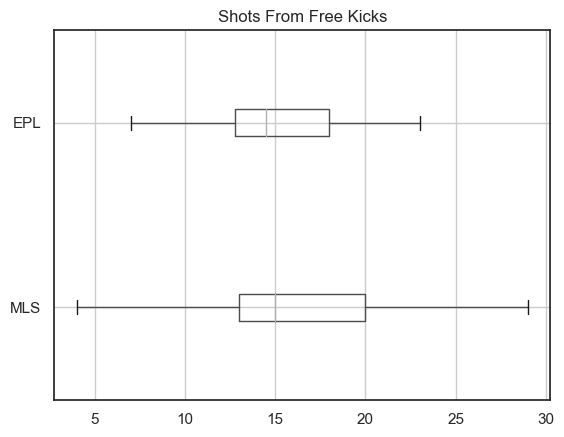

In [59]:
shooting = pd.DataFrame({'MLS': shooting_mls.iloc[:, 12], 'EPL': shooting_epl.iloc[:, 12]}) # Change based on desired stat
shooting.boxplot(vert=False)
plt.title('Shots From Free Kicks')

#### Running a linear regression model on passes for MLS

In [60]:
basic_stats_mls_reset = basic_stats_mls.reset_index()

In [61]:
passing_standings_mls = pd.merge(basic_stats_mls_reset, passes_mls, left_on='Squad', right_on='Squad')

In [62]:
passing_standings_mls = passing_standings_mls[['Squad', 'Position', 'Att', 'Cmp', 'Cmp%', 'TotDist', 'PrgDist']]
passing_standings_mls = passing_standings_mls.iloc[:, [0, 1, 2, 6, 10, 14, 15]]
#passing_standings_epl = passing_standings_epl.iloc[:,:3]
passing_standings_mls.columns = ['Squad', 'League Position', 'Attempted Passes', 'Completed Passes', 'Completed %', 'Total Distance', 'Progressive Distance']
#passing_standings_epl

In [63]:
# Define features (independent variables) and target variable (dependent variable)
features = ['Completed %', 'Attempted Passes', 'Completed Passes', 'Total Distance', 'Progressive Distance']
target = 'League Position'

# Prepare data
X = passing_standings_mls[features]
y = passing_standings_mls[target]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        League Position   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     2.219
Date:                Fri, 19 Jul 2024   Prob (F-statistic):             0.0871
Time:                        11:36:41   Log-Likelihood:                -97.045
No. Observations:                  29   AIC:                             206.1
Df Residuals:                      23   BIC:                             214.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -222.1272 

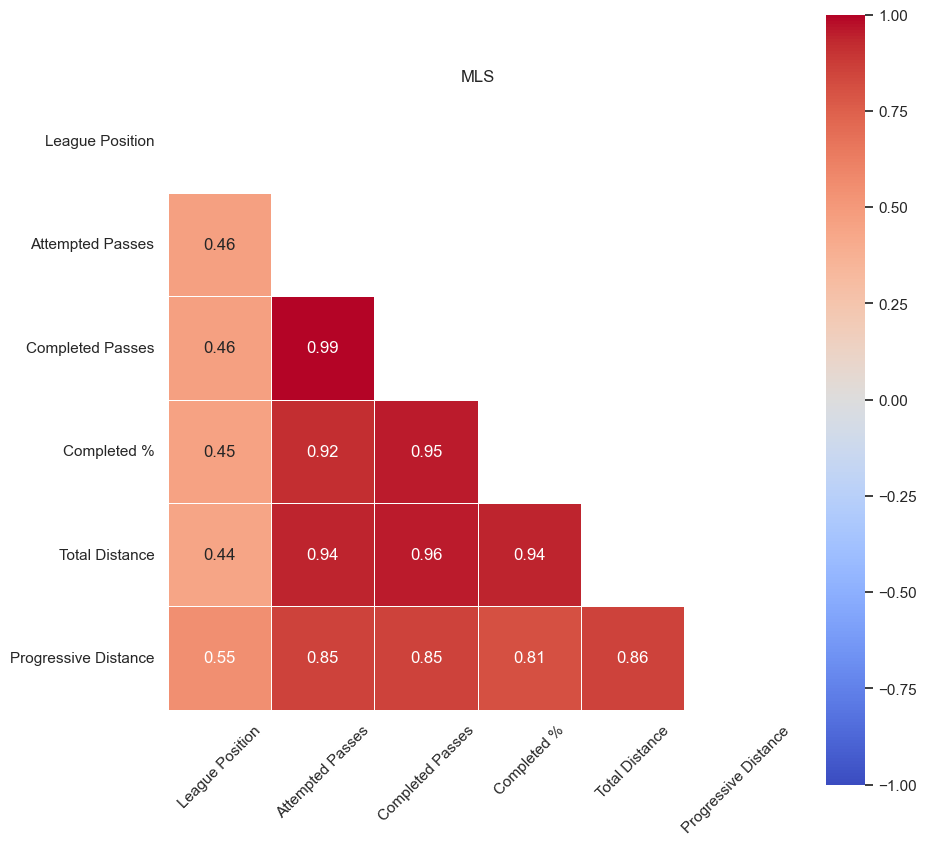

In [64]:
passing_stats_mls_correlation = passing_standings_mls.corr()

# Create a heatmap using seaborn
sns.set(style="white")  # Set the style of the plot

# Generate a mask for the lower triangle including the diagonal
mask = np.triu(np.ones_like(passing_stats_mls_correlation, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask
sns.heatmap(passing_stats_mls_correlation, annot=True, cmap='coolwarm', mask=mask, 
            linewidths=.7, square=True, ax=ax, vmin=-1, vmax=1)

# Customize the plot
plt.title('MLS')

plt.xticks(rotation=45)


plt.show()

#### Running a linear regression model on passes for EPL

In [65]:
basic_stats_epl_reset = basic_stats_epl.reset_index()

In [66]:
passing_standings_epl = pd.merge(basic_stats_epl_reset, passes_epl, left_on='Squad', right_on='Squad')

In [67]:
passing_standings_epl = passing_standings_epl[['Squad', 'Position', 'Att', 'Cmp', 'Cmp%', 'TotDist', 'PrgDist']]
passing_standings_epl = passing_standings_epl.iloc[:, [0, 1, 2, 6, 10, 14, 15]]
passing_standings_epl.columns = ['Squad', 'League Position', 'Attempted Passes', 'Completed Passes', 'Completed %', 'Total Distance', 'Progressive Distance']
passing_standings_epl

,Squad,League Position,Attempted Passes,Completed Passes,Completed %,Total Distance,Progressive Distance
0,Manchester City,1,26642,23263,87.3,396454,114920
1,Arsenal,2,21969,18281,83.2,310206,100635
2,Manchester Utd,3,20525,16603,80.9,276625,97026
3,Newcastle Utd,4,17837,13925,78.1,246297,90893
4,Liverpool,5,24361,20043,82.3,352929,120466
5,Brighton,6,22888,19210,83.9,319736,106474
6,Aston Villa,7,17396,13782,79.2,244073,87581
7,Tottenham,8,19672,15972,81.2,277567,92695
8,Brentford,9,15551,11317,72.8,209962,87002
9,Fulham,10,18014,13974,77.6,255629,89303


In [68]:
# Define features (independent variables) and target variable (dependent variable)
features = ['Completed %', 'Attempted Passes', 'Completed Passes', 'Total Distance', 'Progressive Distance']
target = 'League Position'

# Prepare data
X = passing_standings_epl[features]
y = passing_standings_epl[target]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the multivariate regression model
model = sm.OLS(y, X).fit()

model.title = 'Multivariate Regression Resutls for EPL'

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        League Position   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     4.928
Date:                Fri, 19 Jul 2024   Prob (F-statistic):            0.00825
Time:                        11:36:42   Log-Likelihood:                -53.267
No. Observations:                  20   AIC:                             118.5
Df Residuals:                      14   BIC:                             124.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   44.0753 

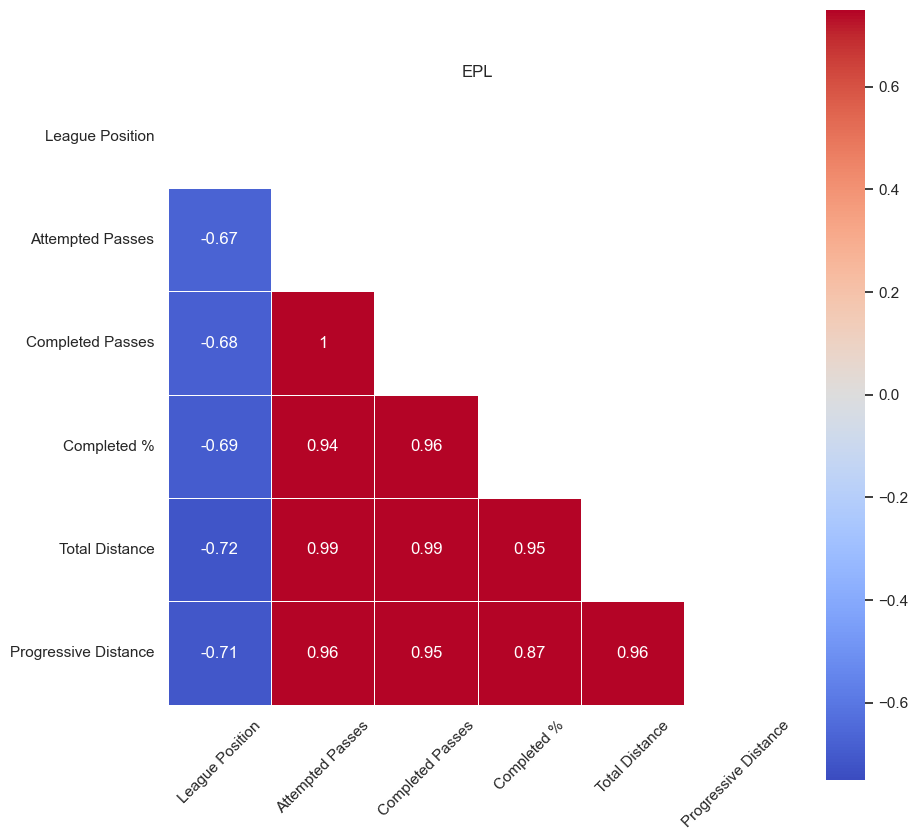

In [69]:
passing_stats_epl_correlation = passing_standings_epl.corr()

# Create a heatmap using seaborn
sns.set(style="white")  # Set the style of the plot

# Generate a mask for the lower triangle including the diagonal
mask = np.triu(np.ones_like(passing_stats_epl_correlation, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap with the mask
sns.heatmap(passing_stats_epl_correlation, annot=True, cmap='coolwarm', mask=mask, 
            linewidths=.7, square=True, ax=ax, vmin=-0.75, vmax=0.75)

# Customize the plot
plt.title('EPL')

plt.xticks(rotation=45)

plt.show()

### Running a t-test on pass types

In [70]:
# MLS
passes_types_mls = passes_mls[['Att', 'Cmp%']]

In [71]:
passes_types_mls = passes_types_mls.iloc[:, [1, 2, 3, 5, 6, 7]]

In [72]:
passes_types_mls.columns = ['Short Attempted', 'Medium Attempted', 'Long Attempted', 'Short%', 'Medium%', 'Long%']

In [73]:
# EPl
passes_types_epl = passes_epl[['Att', 'Cmp%']]

In [74]:
passes_types_epl = passes_types_epl.iloc[:, [1, 2, 3, 5, 6, 7]]

In [75]:
passes_types_epl.columns = ['Short Attempted', 'Medium Attempted', 'Long Attempted', 'Short%', 'Medium%', 'Long%']

In [76]:
# Perform independent t-tests
t_statistic_short_perc, p_value_short_perc = stats.ttest_ind(passes_types_mls['Short%'], passes_types_epl['Short%'], equal_var=False)

t_statistic_short_attempt, p_value_short_attempt = stats.ttest_ind(passes_types_mls['Short Attempted']/34, passes_types_epl['Short Attempted']/38, equal_var=False)
print(p_value_short_perc, p_value_short_attempt)

0.45172778174363515 0.12281217621371024


In [77]:
t_statistic_medium_perc, p_value_medium_perc = stats.ttest_ind(passes_types_mls['Medium%'], passes_types_epl['Medium%'], equal_var=False)

t_statistic_medium_attempt, p_value_medium_attempt = stats.ttest_ind(passes_types_mls['Medium Attempted']/34, passes_types_epl['Medium Attempted']/38, equal_var=False)
print(p_value_medium_perc, p_value_medium_attempt)

0.4125484680302488 0.8335261016376573


In [78]:
t_statistic_long_perc, p_value_long_perc = stats.ttest_ind(passes_types_mls['Long%'], passes_types_epl['Long%'], equal_var=False)

t_statistic_long_attempt, p_value_long_attempt = stats.ttest_ind(passes_types_mls['Long Attempted']/34, passes_types_epl['Long Attempted']/38, equal_var=False)
print(p_value_long_perc, p_value_long_attempt)

0.04708780559269877 0.022420268147092446


In [79]:
t_statistic_total, p_value_total = stats.ttest_ind(passes_mls.iloc[:, 4]/34, passes_epl.iloc[:, 4]/38, equal_var=False)
p_value_total

0.45740978970715973

In [80]:
ttest_results = pd.DataFrame({'Short Completed %': {'t_statistic': t_statistic_short_perc, 'p-value': p_value_short_perc},
                              'Short Attempted': {'t_statistic': t_statistic_short_attempt, 'p-value': p_value_short_attempt},
                             'Medium Completed %': {'t_statistic': t_statistic_medium_perc, 'p-value': p_value_medium_perc},
                             'Medium Attemped': {'t_statistic': t_statistic_medium_attempt, 'p-value': p_value_medium_attempt},
                             'Long Completed %': {'t_statistic': t_statistic_long_perc, 'p-value': p_value_long_perc},
                             'Long Attempted': {'t_statistic': t_statistic_long_attempt, 'p-value': p_value_long_attempt}})

ttest_results.T

,t_statistic,p-value
Short Completed %,0.760155,0.451728
Short Attempted,-1.592515,0.122812
Medium Completed %,0.828554,0.412548
Medium Attemped,0.212291,0.833526
Long Completed %,2.065797,0.047088
Long Attempted,2.366652,0.022420


In [81]:
passes_mls_table = pd.DataFrame({
    'Short Passes': {'Mean': (passes_types_mls['Short Attempted']/34).mean(), 'Standard Deviation': (passes_types_mls['Short Attempted']/34).std()},
    'Medium Passes': {'Mean': (passes_types_mls['Medium Attempted']/34).mean(), 'Standard Deviation': (passes_types_mls['Medium Attempted']/34).std()},
    'Long Passes': {'Mean': (passes_types_mls['Long Attempted']/34).mean(), 'Standard Deviation': (passes_types_mls['Long Attempted']/38).std()}


})
passes_mls_table.T

,Mean,Standard Deviation
Short Passes,188.781947,26.587406
Medium Passes,191.369168,21.129175
Long Passes,75.392495,5.603976


In [82]:
passes_epl_table = pd.DataFrame({
    'Short Passes': {'Mean': (passes_types_epl['Short Attempted']/38).mean(), 'Standard Deviation': (passes_types_epl['Short Attempted']/38).std()},
    'Medium Passes': {'Mean': (passes_types_epl['Medium Attempted']/38).mean(), 'Standard Deviation': (passes_types_epl['Medium Attempted']/38).std()},
    'Long Passes': {'Mean': (passes_types_epl['Long Attempted']/38).mean(), 'Standard Deviation': (passes_types_epl['Long Attempted']/38).std()}


})
passes_epl_table.T

,Mean,Standard Deviation
Short Passes,207.438158,47.510887
Medium Passes,189.271053,40.566849
Long Passes,71.363158,5.560504


In [83]:
print((passes_mls.iloc[:, 4]/34).mean())

479.2596348884381


In [84]:
print((passes_epl.iloc[:, 4]/38).mean())

495.53421052631575


In [85]:
regression = {'MLS': {'R-squared': 0.027}, 'EPL': {'R-squared': 0.638}}
regression = pd.DataFrame(regression)
regression.T

,R-squared
MLS,0.027
EPL,0.638
